In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240919152121_llm_gen.jsonl"
jsonl_path="data/initial_train_data/20240919161042_llm_gen.jsonl"
jsonl_path_list=[
    "/data/hatakeyama/self-loop/0919meltingpoint/data/initial_train_data/20240919213322_llm_gen.jsonl",
    "/data/hatakeyama/self-loop/0919meltingpoint/data/initial_train_data/20240919161042_llm_gen.jsonl",
]
# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each JSONL file and concatenate the results
for jsonl_path in jsonl_path_list:
    temp_df = pd.read_json(jsonl_path, lines=True)
    df = pd.concat([df, temp_df], ignore_index=True)

# Drop specified columns
df = df.drop(columns=["record", "prompt"])

df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-61.00,"N,N-Dimethylformamide",CN(C)C=O,Melting temperature,[oC],170.0,To predict the melting temperature of Compound...,3.786885
1,77.00,4-pyrimidinemethanol,c1cncnc1CO,Melting temperature,[oC],105.0,To predict the melting temperature of Compound...,0.363636
2,67.00,2-cyanobenzenesulfonyl chloride,c1ccc(c(c1)C#N)S(=O)(=O)Cl,Melting temperature,[oC],129.0,To predict the melting temperature of Compound...,0.925373
3,131.00,"6-chloro-2,3-dihydro-3-oxo-4h-1,4-benzoxazine-...",c1cc2c(cc1Cl)N(C(=O)CO2)CCC#N,Melting temperature,[oC],130.5,To predict the melting temperature of 6-chloro...,0.003817
4,104.25,"1,3-cyclohexanedione",C1CC(=O)CC(=O)C1,Melting temperature,[oC],50.0,Compound X consists of two carbonyl groups att...,0.520384
...,...,...,...,...,...,...,...,...
359803,132.00,"2,4-dinitro-1-naphthol",c1ccc2c(c1)c(cc(c2O)[N+](=O)[O-])[N+](=O)[O-],Melting temperature,[oC],275.0,To predict the melting temperature of Compound...,1.083333
359804,92.00,"(1Z)-1,2-diphenylethanone O-(phenylcarbonyl)oxime",O=C(ON=C(Cc1ccccc1)c1ccccc1)c1ccccc1,Melting temperature,[oC],250.0,To predict the melting temperature of Compound...,1.717391
359805,156.25,Moricizine,S1c2ccccc2N(c2cc(NC(=O)OCC)ccc12)C(=O)CCN1CCOCC1,Melting temperature,[oC],150.0,"To predict the melting point of Compound X, we...",0.040000
359806,143.00,Suberic acid,O=C(O)CCCCCCC(=O)O,Melting temperature,[oC],143.0,To predict the melting temperature of Compound...,0.000000


<Axes: xlabel='error_rate', ylabel='Count'>

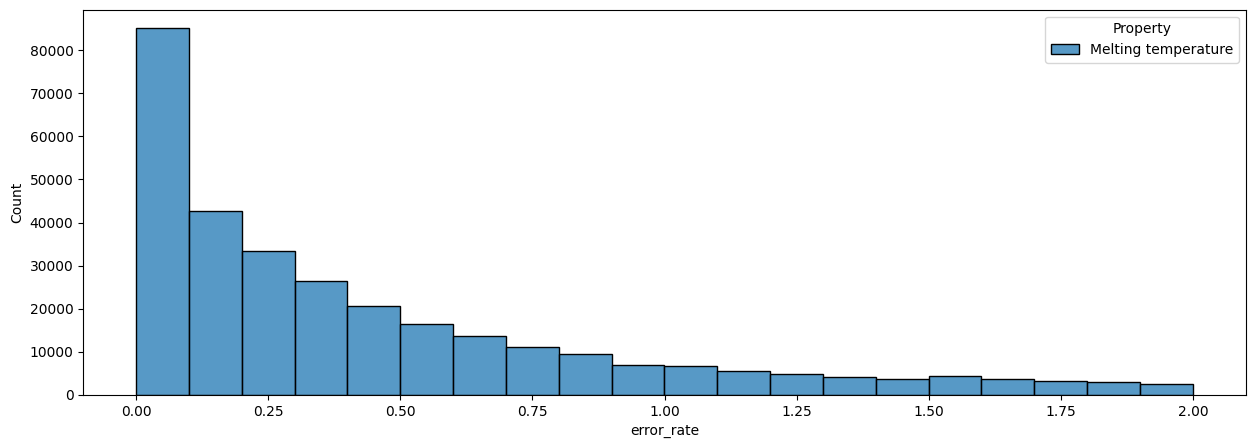

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)

In [13]:
for t in sorted(list(set(df["Property"]))):
    print(t)

Melting temperature


In [14]:

df["error_rate"].median()

0.36796536796536705

In [16]:

error_threshold=0.05
max_records=200

df=df.sort_values(by="error_rate")
df["cond"]=df["CompoundName"]+" "+df["SMILES"]+" "+df["Property"]
df=df.drop_duplicates(subset=["cond"])
df=df[df["error_rate"]<error_threshold]
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate,cond
100228,86.0,2-hydroxy-5-(trifluoromethoxy)benzonitrile,c1cc(c(cc1OC(F)(F)F)C#N)O,Melting temperature,[oC],86.0,"To predict the melting point of Compound X, we...",0.000000,2-hydroxy-5-(trifluoromethoxy)benzonitrile c1c...
100218,162.0,"4,4'-thiobis(6-tert-butyl-3-cresol)",CC(C)(C)c2cc(Sc1cc(c(O)cc1C)C(C)(C)C)c(C)cc2O,Melting temperature,[oC],162.0,"To predict the melting point of Compound X, we...",0.000000,"4,4'-thiobis(6-tert-butyl-3-cresol) CC(C)(C)c2..."
100146,145.0,"glutarimide, 3,3-dimethyl-",CC1(C)CC(=O)NC(=O)C1,Melting temperature,[oC],145.0,1. Cyclobutyl group is fused with two amide gr...,0.000000,"glutarimide, 3,3-dimethyl- CC1(C)CC(=O)NC(=O)C..."
218457,134.0,"methyl 3-(2-oxo-1,2,3,4-tetrahydroquinolin-6-y...",O=C1Nc2ccc(cc2CC1)CCC(=O)OC,Melting temperature,[oC],134.0,"Methyl 3-(2-oxo-1,2,3,4-tetrahydroquinolin-6-y...",0.000000,"methyl 3-(2-oxo-1,2,3,4-tetrahydroquinolin-6-y..."
200137,-80.0,Dibutyl sulfide,CCCCSCCCC,Melting temperature,[oC],-80.0,To predict the melting temperature of Compound...,0.000000,Dibutyl sulfide CCCCSCCCC Melting temperature
...,...,...,...,...,...,...,...,...,...
107701,161.0,"ethyl 2,2-bis[(Z)-(4,7,7-trimethyl-3-oxobicycl...",O=C1C(=CC(C=C2C(=O)C3(C)CCC2C3(C)C)(CCC)C(=O)O...,Melting temperature,[oC],153.0,To predict the melting temperature of Compound...,0.049689,"ethyl 2,2-bis[(Z)-(4,7,7-trimethyl-3-oxobicycl..."
170778,161.0,tepa 4-(piperidinyl)-urea derivative,O=C(NP(=O)(N1CC1)N2CC2)NC3CC(C)(C)NC(C)(C)C3,Melting temperature,[oC],153.0,To predict the melting temperature of the give...,0.049689,tepa 4-(piperidinyl)-urea derivative O=C(NP(=O...
120234,181.0,"[4-(2,6-Diphenyl-pyran-4-ylidenemethyl)-phenyl...",O1C(=CC(C=C1c1ccccc1)=Cc1ccc(N(C)C)cc1)c1ccccc1,Melting temperature,[oC],190.0,To predict the melting temperature of Compound...,0.049724,"[4-(2,6-Diphenyl-pyran-4-ylidenemethyl)-phenyl..."
176657,181.0,nebularine,OCC3OC(n2cnc1cncnc12)C(O)C3O,Melting temperature,[oC],190.0,"To predict the melting point of Compound X, we...",0.049724,nebularine OCC3OC(n2cnc1cncnc12)C(O)C3O Meltin...
